In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from surprise import Reader, Dataset,SVD
from surprise.accuracy import rmse,mae
from surprise.model_selection import cross_validate

### 1. Import Data

In [47]:
df = pd.read_csv('ratings.csv')

In [48]:
df.shape

(100836, 4)

In [49]:
df.drop(columns = ['timestamp'],inplace = True)

In [50]:
df.isnull().sum()

userId     0
movieId    0
rating     0
dtype: int64

### 2. EDA

In [51]:
n_movie = len(df['userId'].unique())
n_user = len(df['movieId'].unique())
print('unique user: ' + str(n_movie))
print('unique movies: '+ str(n_user))

unique user: 610
unique movies: 9724


In [52]:
# data sparsity = (#missing values / #Total Values) * 100
available_rating = df['rating'].count()
total_rating = n_movie * n_user
missing_rating = total_rating - available_rating
sparsity = missing_rating / total_rating
print('sparsity: '+str(sparsity))

sparsity: 0.9830003169443864


<AxesSubplot:>

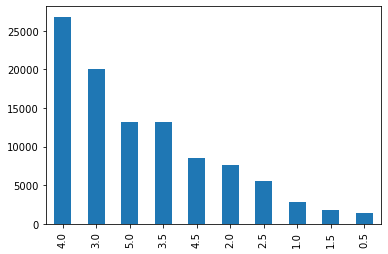

In [53]:
df['rating'].value_counts().plot(kind = 'bar')

### 3. Dimension Reduction

In [54]:
filter_movie = df['movieId'].value_counts() > 3

In [55]:
filter_movie = filter_movie[filter_movie].index.tolist()

In [56]:
filter_user = df['userId'].value_counts() > 3

In [57]:
filter_user = filter_user[filter_user].index.tolist()

In [58]:
df = df[(df['movieId'].isin(filter_movie)) & (df['userId'].isin(filter_user))]

In [59]:
df.shape

(92394, 3)

### 4. Creating Training & Testing Data Set

In [60]:
cols = ['userId','movieId','rating']
reader = Reader(rating_scale = (0.5,5))

In [62]:
data = Dataset.load_from_df(df[cols],reader)

In [64]:
data.head()

AttributeError: 'DatasetAutoFolds' object has no attribute 'head'